The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples.


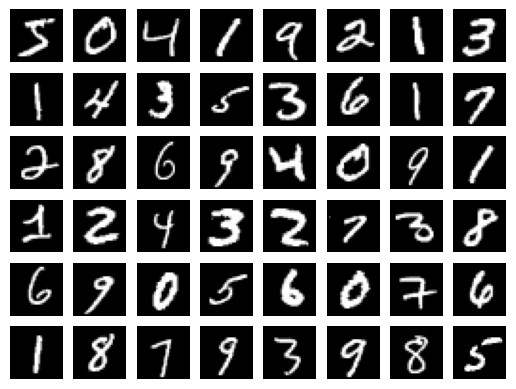

<Training set array size>:
X_train = (55000, 784)
y_train = (55000,) 

<Validation set array size>:
X_validation = (5000, 784)
y_validation = (5000,) 

<Test set array size>:
X_test = (10000, 784)
t_test = (10000,)


In [1]:
import nn
import numpy as np
import matplotlib.pyplot as plt

validation_number = 5000
data = nn.data_preprocess_from_keras_mnist(validation_number)

In [2]:
D = 28*28  # An integer giving the size of the input
C = 10     # An integer giving the size of the hidden layer
H = 100    # An integer giving the number of classes to classify
std = 1e-3 # Scalar giving the standard deviation for random initialization of the weights.

model = nn.FCNeuralNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

s = nn.Solver(model,
              data,
              update_rule='sgd',
              optim_config={'learning_rate': 1e-3,},
              lr_decay=0.95,
              num_epochs=5,
              batch_size=100,
              verbose=False,
              print_every=10000)
s.train()

(Epoch 0 / 5) train acc: 13.40%    val_acc: 14.08%
(Epoch 1 / 5) train acc: 93.60%    val_acc: 93.16%
(Epoch 2 / 5) train acc: 95.40%    val_acc: 95.56%
(Epoch 3 / 5) train acc: 96.80%    val_acc: 96.46%
(Epoch 4 / 5) train acc: 97.10%    val_acc: 96.92%
(Epoch 5 / 5) train acc: 97.30%    val_acc: 97.04%


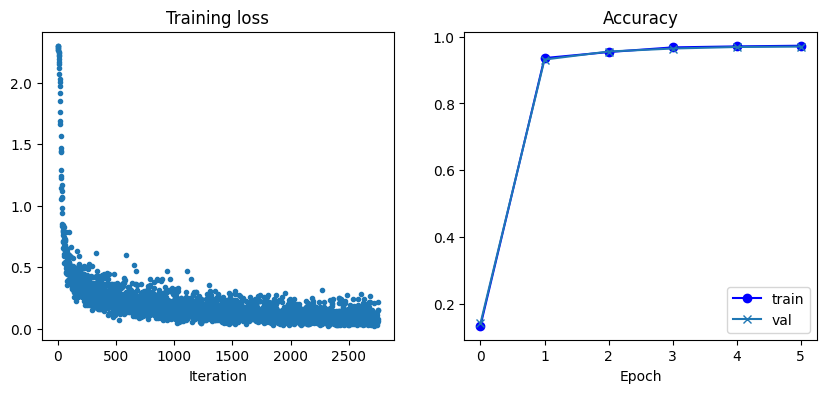

In [3]:
plt.subplot(1, 2, 1)
plt.title('Training loss')
plt.plot(s.loss_history, '.')
plt.xlabel('Iteration')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(s.train_acc_history, '-o', label='train', color = 'b')
plt.plot(s.val_acc_history, '-x', label='val')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(10, 4)

In [4]:
test_acc = s.check_accuracy(X=np.array(data['X_test'], np.float32), y=data['y_test'])
print('Test accuracy: {:.2f}%'.format(test_acc * 100))

Test accuracy: 96.74%


In [5]:
s2 = nn.Solver(model,
              data,
              update_rule='adam',
              optim_config={'learning_rate': 1e-3,},
              lr_decay=0.95,
              num_epochs=5,
              batch_size=100,
              verbose=False,
              print_every=10000)
s2.train()

(Epoch 0 / 5) train acc: 46.90%    val_acc: 47.08%
(Epoch 1 / 5) train acc: 97.00%    val_acc: 95.50%
(Epoch 2 / 5) train acc: 96.30%    val_acc: 95.56%
(Epoch 3 / 5) train acc: 98.30%    val_acc: 96.78%
(Epoch 4 / 5) train acc: 96.10%    val_acc: 95.34%
(Epoch 5 / 5) train acc: 98.20%    val_acc: 96.66%


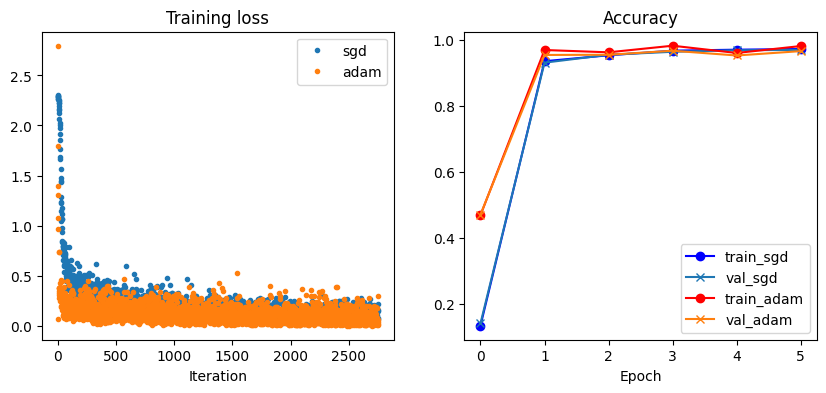

In [6]:
plt.subplot(1, 2, 1)
plt.title('Training loss')
plt.plot(s.loss_history, '.', label = 'sgd')
plt.plot(s2.loss_history, '.', label = 'adam')
plt.xlabel('Iteration')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(s.train_acc_history, '-o', label='train_sgd', color = 'b')
plt.plot(s.val_acc_history, '-x', label='val_sgd')

plt.plot(s2.train_acc_history, '-o', label='train_adam', color = 'r')
plt.plot(s2.val_acc_history, '-x', label='val_adam')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(10, 4)

In [7]:
test_acc = s2.check_accuracy(X=np.array(data['X_test'], np.float32), y=data['y_test'])
print('Test accuracy: {:.2f}%'.format(test_acc * 100))

Test accuracy: 96.70%
